**8.18.** List all samples of size \$n = 2 \$ that are possible (with replacement) from the population in Problem 8.17. Use the chart wizard of EXCEL to plot the sampling distribution of the mean to show that \$ \mu_{\bar{x}} = \mu \$, and show that \$ \sigma^2_{\bar{x}} = \sigma^2/2 \$.

A,B,mean,xbar,p(xbar),xbar * p(xbar),xbar^2 * p(xbar)
9,9,9.000000,9.000000,0.111111,1.000000,9.000000
9,12,10.500000,10.500000,0.222222,2.333333,24.500000
9,15,12.000000,12.000000,0.333333,4.000000,48.000000
12,9,10.500000,13.500000,0.222222,3.000000,40.500000
12,12,12.000000,15.000000,0.111111,1.666667,25.000000
12,15,13.500000,,,12.000000,147.000000
15,9,12.000000,,,,
15,12,13.500000,,,,
15,15,15.000000,,,,


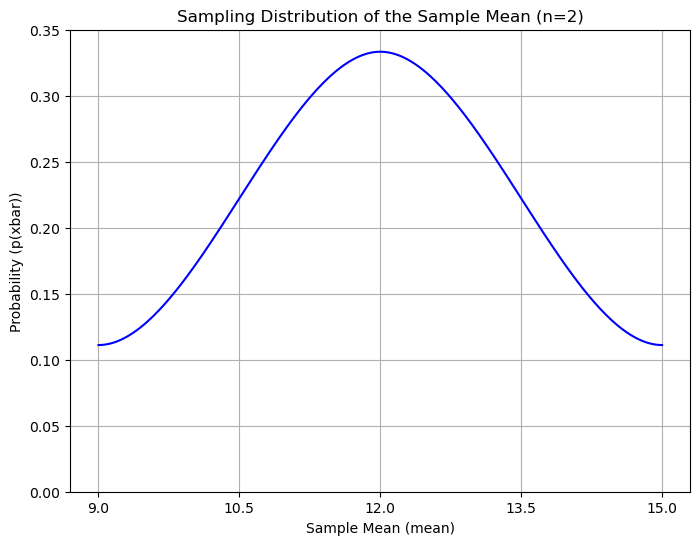

In [43]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from scipy.interpolate import make_interp_spline
import numpy as np
from IPython.display import display

population = [9, 12, 15]
samples = list(itertools.product(population, repeat=2))

df = pd.DataFrame(samples, columns=['A', 'B'])
df['mean'] = df[['A', 'B']].mean(axis=1)

distinct_means = sorted(df['mean'].unique())
specified_probabilities = [1/9, 2/9, 1/3, 2/9, 1/9]

df['xbar'] = pd.NA
df['p(xbar)'] = pd.NA
df.loc[:4, ['xbar', 'p(xbar)']] = list(zip(distinct_means, specified_probabilities))
df['xbar * p(xbar)'] = df['xbar'] * df['p(xbar)']
df['xbar^2 * p(xbar)'] = (df['xbar'] ** 2) * df['p(xbar)']
df.loc[5, 'xbar * p(xbar)'] = df['xbar * p(xbar)'].sum()
df.loc[5, 'xbar^2 * p(xbar)'] = df['xbar^2 * p(xbar)'].sum()

display(df.style.hide(axis="index"))

mean_counts = Counter(df['mean'])
means = list(mean_counts.keys())
probabilities = [count / len(samples) for count in mean_counts.values()]

x = np.array(means)
y = np.array(probabilities)
x_smooth = np.linspace(x.min(), x.max(), 300)
spl = make_interp_spline(x, y, k=3)
y_smooth = spl(x_smooth)

plt.figure(figsize=(8, 6))
plt.plot(x_smooth, y_smooth, color='b')
plt.title('Sampling Distribution of the Sample Mean (n=2)')
plt.xlabel('Sample Mean (mean)')
plt.ylabel('Probability (p(xbar))')
plt.xticks(x); plt.grid(True); plt.ylim(0, 0.35); plt.show()

Since the table is already completed, we can now prove the identities stated in the question.

First, we want to show that \$ \mu_{\bar{x}} = \mu \$.
\begin{align}
    \mu_{\bar{x}} = \mu \\
    \sum{\bar{x}_ip(\bar{x})} = \frac{\sum{x_i}}{n} \\
    1+\frac{7}{3}+4+3+\frac{5}{3} = \frac{9+12+15}{3} \\
    12 = 12 \\
\end{align}

Next, we want to show that \$ \sigma^2_{\bar{x}} = \sigma^2/2 \$.
\begin{align}
    \sigma^2_{\bar{x}} = \sigma^2/2 \\
    \sum{(\bar{x}_i^2p(\bar{x}))-\mu_{\bar{x}}^2} = \frac{\frac{1}{3}\sum{[(x_{i}-\mu_{\bar{x}})^2]}}{2} \\
    9+24.5+48+40.5+25-12^2 = \frac{\frac{1}{3}[(9-12)^2+(12-12)^2+(15-12)^2]}{2} \\
    3 = 3 \\
\end{align}

**8.21.** A population consists of the four numbers 3, 7, 11, and 15. Consider all possible samples of size 2 that can be drawn with replacement from this population. Find (a) the population mean, (b) the population standard deviation, (c) the mean of the sampling distribution of means, and (d) the standard deviation of the sampling distribution of means. Verify parts (c) and (d) directly from (a) and (b) by using suitable formulas.

In [42]:
population = np.array([3, 7, 11, 15])

population_mean = np.mean(population)
population_std = np.std(population, ddof=0)

samples = np.array([[x, y] for x in population for y in population])
sample_means = np.mean(samples, axis=1)
sampling_mean = np.mean(sample_means)

sampling_std = np.std(sample_means, ddof=0)
standard_error = population_std / np.sqrt(2)

data = {
    'Statistic': ['Population Mean', 'Population Standard Deviation', 'Sampling Distribution Mean', 'Sampling Distribution Std. Dev.'],
    'Value': [population_mean, population_std, sampling_mean, sampling_std]
}

df = pd.DataFrame(data)
display(df.style.format(precision=2).hide(axis="index"))

Statistic,Value
Population Mean,9.00
Population Standard Deviation,4.47
Sampling Distribution Mean,9.00
Sampling Distribution Std. Dev.,3.16


**8.34.** Find the probability that of the next 200 children born, (a) less than 40% will be boys, (b) between 43% and 57% will be girls, and (c) more than 54% will be boys. Assume equal probabilities for the births of boys and girls.s.

In [41]:
import scipy.stats as stats

n = 200
p = 0.5
mu = n * p
sigma = (n * p * (1 - p)) ** 0.5

x_a = 0.40 * n
z_a = (x_a - mu) / sigma
p_a = stats.norm.cdf(z_a)

x_b1 = 0.43 * n
x_b2 = 0.57 * n
z_b1 = (x_b1 - mu) / sigma
z_b2 = (x_b2 - mu) / sigma
p_b = stats.norm.cdf(z_b2) - stats.norm.cdf(z_b1)

x_c = 0.54 * n
z_c = (x_c - mu) / sigma
p_c = 1 - stats.norm.cdf(z_c)

data = {
    'Condition': ['P(X < 80)', 'P(86 < X < 114)', 'P(X > 108)'],
    'Probability': [p_a, p_b, p_c]
}

df = pd.DataFrame(data)
display(df.style.format(precision=4).hide(axis="index"))

Condition,Probability
P(X < 80),0.0023
P(86 < X < 114),0.9523
P(X > 108),0.1289


**8.49.** The credit hour distribution at Metropolitan Technological College is as follows:

$$ 
\begin{array}{|c|c|c|c|c|c|}
\hline
x & 6 & 9 & 12 & 15 & 18 \\
\hline
p(x) & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
\hline
\end{array}
$$


Find \$\mu\$ and \$\sigma^2\$. Give the 25 (with replacement) possible samples of size 2, their means, and probabilities.

In [45]:
x_values = [6, 9, 12, 15, 18]
probabilities = [0.1, 0.2, 0.4, 0.2, 0.1]

mean_x = round(sum([x * p for x, p in zip(x_values, probabilities)]),0)
variance_x = sum([((x - mean_x) ** 2) * p for x, p in zip(x_values, probabilities)])

print(f'The mean of the credit hour distribution is {mean_x}')
print(f'The variance of the credit hour distribution is {variance_x}\n')

samples = []

for x1 in x_values:
    for x2 in x_values:
        samples.append((x1, x2))

sample_means = [(s[0] + s[1]) / 2 for s in samples]

sample_probs = [
    probabilities[x_values.index(s[0])] * probabilities[x_values.index(s[1])]
    for s in samples
]

df = pd.DataFrame({
    'Sample': samples,
    'Mean': sample_means,
    'Probability': sample_probs
})

display(df.style.format(precision=2).hide(axis="index"))

The mean of the credit hour distribution is 12.0
The variance of the credit hour distribution is 10.8



Sample,Mean,Probability
"(6, 6)",6.00,0.01
"(6, 9)",7.50,0.02
"(6, 12)",9.00,0.04
"(6, 15)",10.50,0.02
"(6, 18)",12.00,0.01
"(9, 6)",7.50,0.02
"(9, 9)",9.00,0.04
"(9, 12)",10.50,0.08
"(9, 15)",12.00,0.04
"(9, 18)",13.50,0.02
